In [1]:
%load_ext autoreload
%autoreload 2

In [84]:
import os
from glob import glob
from pathlib import Path

import matplotlib.pyplot as plt
import matplotlib.colors as colors

import cartopy
import cartopy.crs as ccrs

import roms_tools as rt

import config
import model

ModuleNotFoundError: No module named 'cmocean'

In [78]:
grid_yamls = (config.paths.here / "blueprints").glob("*.grd.yaml")
grids = []
for f in grid_yamls:
    grids.append(rt.Grid.from_yaml(f))

len(grids)

3

In [79]:
g.ds

<xarray.Dataset> Size: 15kB
Dimensions:       (eta_rho: 12, xi_rho: 12, xi_u: 11, eta_v: 11, eta_coarse: 7,
                   xi_coarse: 7, s_rho: 5, s_w: 6)
Coordinates:
    lat_rho       (eta_rho, xi_rho) float64 1kB -10.79 -10.81 ... 8.886 8.905
    lon_rho       (eta_rho, xi_rho) float64 1kB 344.2 347.8 ... 20.14 23.73
    lat_u         (eta_rho, xi_u) float64 1kB -10.8 -10.81 ... 8.877 8.895
    lon_u         (eta_rho, xi_u) float64 1kB 346.0 349.6 353.2 ... 18.35 21.93
    lat_v         (eta_v, xi_rho) float64 1kB -9.898 -9.918 ... 7.997 8.016
    lon_v         (eta_v, xi_rho) float64 1kB 344.2 347.8 351.4 ... 20.15 23.73
    lat_coarse    (eta_coarse, xi_coarse) float64 392B -11.67 -11.7 ... 9.803
    lon_coarse    (eta_coarse, xi_coarse) float64 392B 342.3 349.6 ... 25.52
Dimensions without coordinates: eta_rho, xi_rho, xi_u, eta_v, eta_coarse,
                                xi_coarse, s_rho, s_w
Data variables: (12/15)
    angle         (eta_rho, xi_rho) float64 1kB -0.004952 -0.004952 ... 0.004924
    f             (eta_rho, xi_rho) float64 1kB -2.722e-05 ... 2.251e-05
    pm            (eta_rho, xi_rho) float64 1kB 5.049e-06 ... 5.049e-06
    pn            (eta_rho, xi_rho) float64 1kB 2.537e-06 ... 2.537e-06
    spherical     |S1 1B b'T'
    mask_rho      (eta_rho, xi_rho) int32 576B 1 1 1 1 1 1 1 1 ... 0 0 0 0 0 0 0
    ...            ...
    mask_coarse   (eta_coarse, xi_coarse) int32 196B 1 1 1 1 1 0 ... 0 0 0 0 0 0
    h             (eta_rho, xi_rho) float64 1kB 2.91e+03 2.91e+03 ... 16.63
    sigma_r       (s_rho) float32 20B -0.9 -0.7 -0.5 -0.3 -0.1
    Cs_r          (s_rho) float32 20B -0.809 -0.4007 -0.1513 -0.04195 -0.004025
    sigma_w       (s_w) float32 24B -1.0 -0.8 -0.6 -0.4 -0.2 0.0
    Cs_w          (s_w) float32 24B -1.0 -0.5929 -0.2538 -0.08406 -0.01703 0.0
Attributes: (12/13)
    title:                   ROMS grid created by ROMS-Tools
    roms_tools_version:      3.1.3.dev13+g2830da646
    size_x:                  4000
    size_y:                  2000
    center_lon:              4.0
    center_lat:              -1.0
    ...                      ...
    straddle:                True
    topography_source_name:  ETOPO5
    hmin:                    5.0
    theta_s:                 5.0
    theta_b:                 2.0
    hc:                      300.0

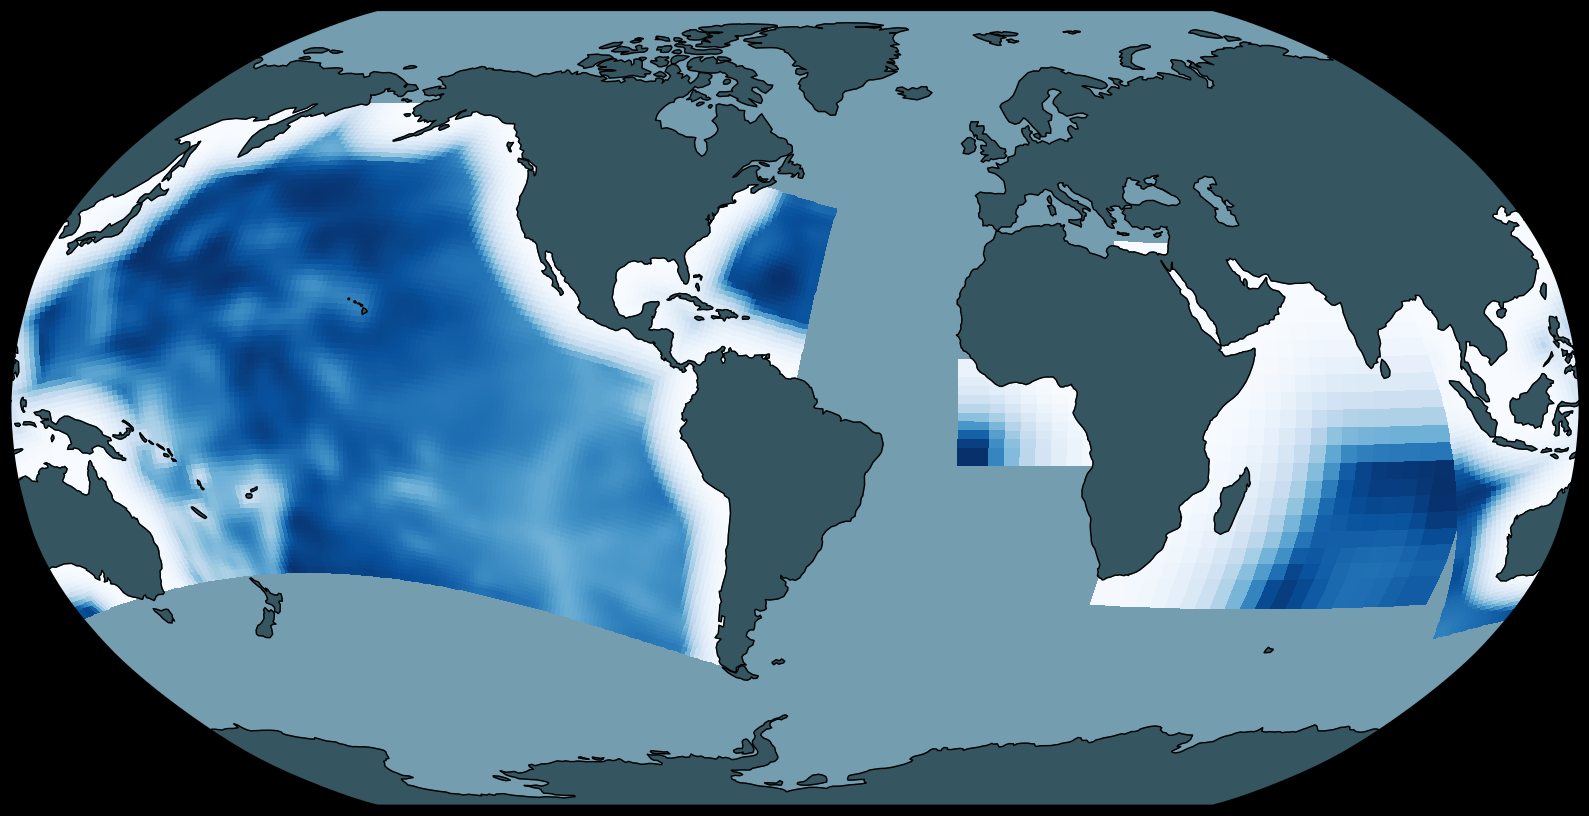

In [87]:
prj = ccrs.Robinson(central_longitude=305.0)

fig, ax = plt.subplots(
    figsize=(12, 12),
    facecolor='k',
    subplot_kw=dict(projection=prj),
)

ocean = ax.add_feature(
    cartopy.feature.NaturalEarthFeature(
        'physical','ocean','110m',
        edgecolor='face',
        facecolor='#749EB0',
        zorder=-9999,
    )
)

land = ax.add_feature(
     cartopy.feature.NaturalEarthFeature(
         'physical','land','110m',
         edgecolor='face',
         facecolor='#355560'
     )
 )

ax.coastlines()

ax.spines['geo'].set_visible(True)
ax.spines['geo'].set_linewidth(2)
ax.spines['geo'].set_edgecolor('black')

for g in grids:
    ax.pcolormesh(
        g.ds.lon_rho, g.ds.lat_rho, g.ds.h, 
        #edgecolors='k', linewidth=0.25,
        transform=ccrs.PlateCarree(),
        cmap="Blues",
        vmin=100,
    )
    #rt.plot.plot(g.ds.h, g.ds, ax=ax)

ax.set_global() # For a global map

fig_size = (16, 9)
fig.set_size_inches(fig_size)
fig.tight_layout()

#fig.savefig('world-map.png', dpi=300, transparent=True)
    